# CP1 - AI e Chatbot 🤘


## **Integrantes:**
- Carlos Henrique Furtado - RM553597
- Thaís Ribeiro Asfur - RM553870

Turma: 1TDSZ


## Dataset Utilizado

Para o CP1, utilizamos um dataset de restaurantes disponível no Kaggle. Este dataset contém informações sobre restaurantes, incluindo preço e avaliação.

**Link do Dataset:** [Restaurant Dataset](https://www.kaggle.com/datasets/mohdshahnawazaadil/restaurant-dataset)

## Descrição do CP

Tentamos tratar, extrair e plotar a maior quantidade de dados relevantes possíveis. Selecionamos o DF de restaurantes, por ser um tema mais simples e fácil de entender. 😁

OBS: Tivemos uma dificuldade em importar o CSV de forma remota, por isso utilizamos o arquivo local (/Dataset.csv), enviamos junto dentro dessa pasta, o senhor pediu apenas 1 arquivo, mas não conseguimos.

In [23]:
# Importando as bibliotecas para o projeto
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Configuração padrão de estilo do Seaborn
sns.set_style('whitegrid')

In [1]:
# Carregando o CSV com os valores separados por virgula
# Professor consegui carregar o arquivo apenas localmente! O CSV está junto com esse arquivo que enviamos
dados = pd.read_csv('/content/Dataset.csv', sep=',')

# Validar se o Data Set está sendo carregado corretamente
type(dados)
dados.head(10)

NameError: name 'pd' is not defined

In [43]:
# Descrever o conjunto de dados
descricao_dados = dados.describe()
print(descricao_dados)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [44]:
# Carregando algumas informações básicas sobre o CSV
print("----- INFORMAÇÕES DO DF -----")

# Origem | Nome | Tamanho
print("Nome: restaurant-dataset ")

tamanho_arquivo = dados.memory_usage().sum()
tamanho_mb = round(tamanho_arquivo / (1024 * 1024), 2)

# Exibir o tamanho do DataFrame em MB
print("\nO tamanho do DF Cozinhas é aproximadamente:", tamanho_mb, "MB")

# Quantidade de registros
quantidade_registros = len(dados)
print("\nQuantidade de registros dentro do Dataset: ", quantidade_registros)

# Número de linhas e colunas
info_xy = dados.shape
print("\nNúmero de linhas:", info_xy [0] )
print("\nNúmero de colunas:", info_xy [1] )

# Validando os dados faltantes
print("\nDados faltantes por coluna:")
dados_faltantes = dados.isnull().sum()
print(dados_faltantes)


----- INFORMAÇÕES DO DF -----
Nome: restaurant-dataset 

O tamanho do DF Cozinhas é aproximadamente: 1.53 MB

Quantidade de registros dentro do Dataset:  9551

Número de linhas: 9551

Número de colunas: 21

Dados faltantes por coluna:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [39]:
# Informações sobre a variável 'Price Range'
price_range_mean = round(dados['Price range'].mean(), 2)
price_range_median = dados['Price range'].median()
price_range_variance = dados['Price range'].var()
price_range_std = dados['Price range'].std()

print("Estatísticas para 'Price Range':")
print("  - Média: {:.2f}".format(price_range_mean))
print("  - Mediana: {:.2f}".format(price_range_median))
print("  - Variância: {:.2f}".format(price_range_variance))
print("  - Desvio Padrão: {:.2f}".format(price_range_std))

# Informações sobre a variável 'Aggregate Rating'
aggregate_rating_median = dados['Aggregate rating'].median()
aggregate_rating_variance = dados['Aggregate rating'].var()
aggregate_rating_std = dados['Aggregate rating'].std()

print("\nEstatísticas para 'Aggregate Rating':")
print("  - Mediana: {:.2f}".format(aggregate_rating_median))
print("  - Variância: {:.2f}".format(aggregate_rating_variance))
print("  - Desvio Padrão: {:.2f}".format(aggregate_rating_std))

# Informações sobre a variável 'Votes'
votes_median = dados['Votes'].median()
votes_variance = dados['Votes'].var()
votes_std = dados['Votes'].std()

print("\nEstatísticas para 'Votes':")
print("  - Mediana: {:.2f}".format(votes_median))
print("  - Variância: {:.2f}".format(votes_variance))
print("  - Desvio Padrão: {:.2f}".format(votes_std))


Estatísticas para 'Price Range':
  - Média: 1.80
  - Mediana: 2.00
  - Variância: 0.82
  - Desvio Padrão: 0.91

Estatísticas para 'Aggregate Rating':
  - Mediana: 3.20
  - Variância: 2.30
  - Desvio Padrão: 1.52

Estatísticas para 'Votes':
  - Mediana: 31.00
  - Variância: 185045.49
  - Desvio Padrão: 430.17


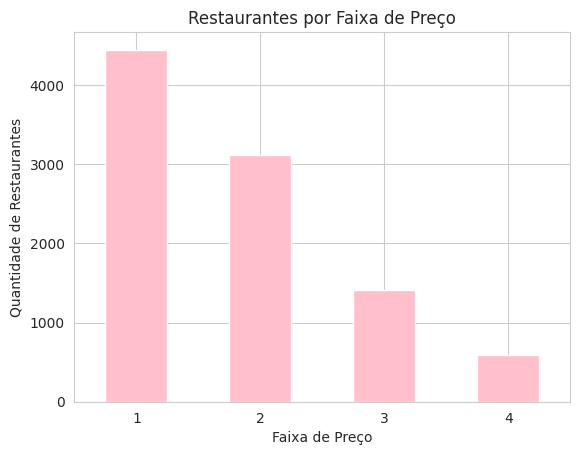

In [48]:
# Carregando por faixa de preço

dados['Price range' ].value_counts().sort_index().plot(kind='bar', color='pink')
plt.xlabel('Faixa de Preço')
plt.ylabel('Quantidade de Restaurantes')
plt.title('Qtd. de Restaurantes por Faixa de Preço' )
plt.xticks(rotation=0)
plt.show()

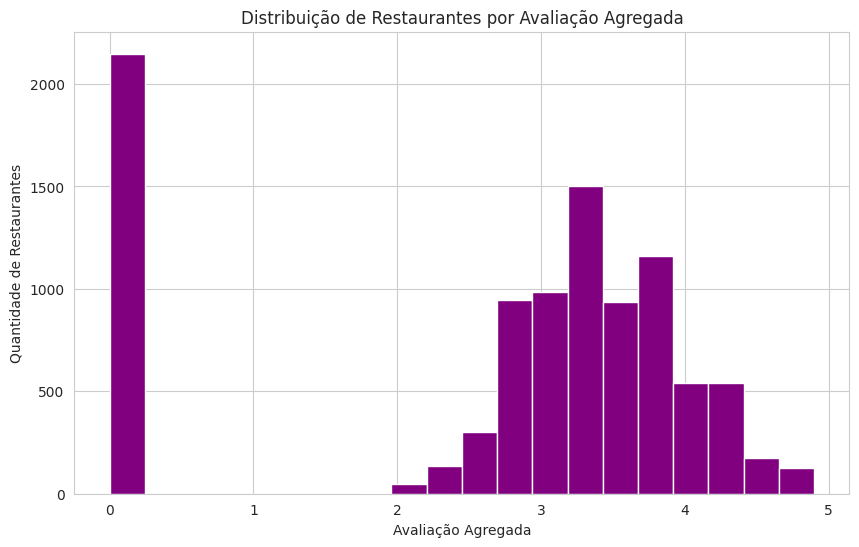

In [29]:
plt.figure(figsize=(10, 6))
dados['Aggregate rating'].plot(kind='hist', bins=20, color='purple')
plt.xlabel('Avaliação Agregada')
plt.ylabel('Quantidade de Restaurantes')
plt.title('Distribuição de Restaurantes por Avaliação Agregada')
plt.show()

Text(0.5, 1.0, 'Distribuição de Restaurantes por Votos')

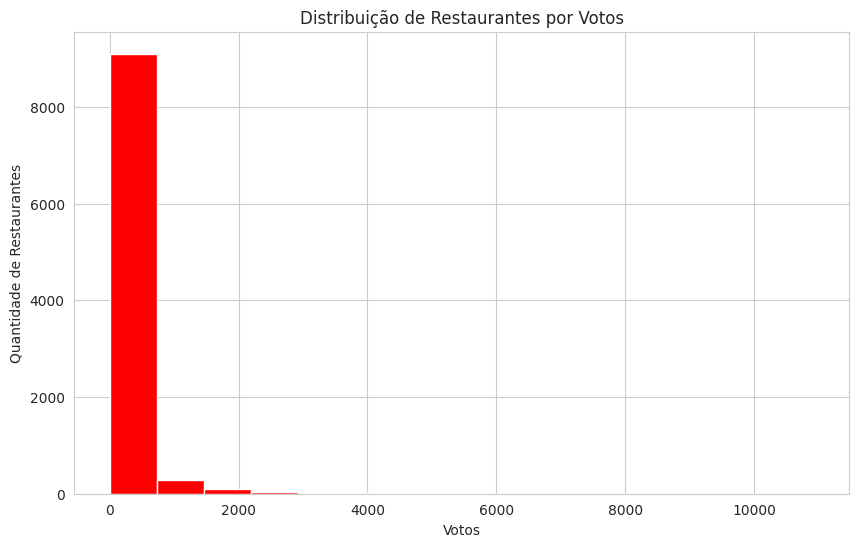

In [50]:
plt.figure(figsize=(10, 6))
dados ['Votes'].plot(kind='hist', bins=15, color='red')
plt.xlabel( 'Votos')
plt.ylabel( 'Quantidade de Restaurantes')
plt.title('Distribuição de Restaurantes por Votos')

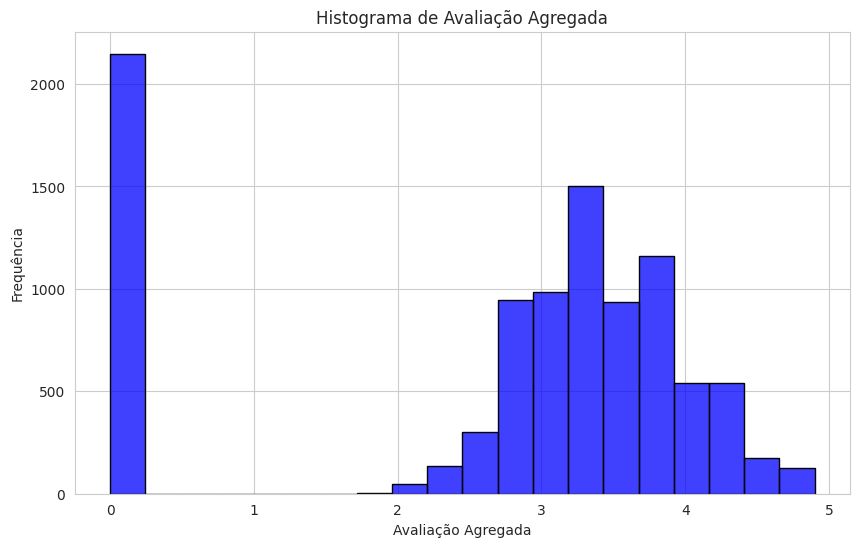

In [31]:
# Histograma de Avaliação Agregada (Aggregate rating)
plt.figure(figsize=(10, 6))
sns.histplot(dados['Aggregate rating'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Avaliação Agregada')
plt.ylabel('Frequência')
plt.title('Histograma de Avaliação Agregada')
plt.show()

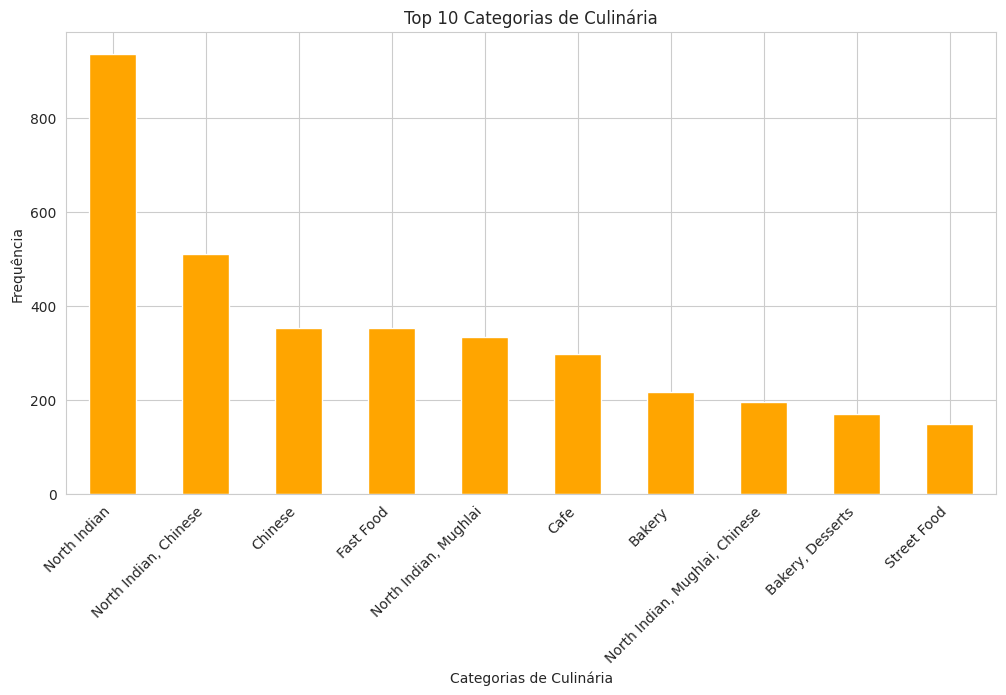

In [32]:
plt.figure(figsize=(12, 6))
dados['Cuisines'].value_counts().head(10).plot(kind='bar', color='orange')
plt.xlabel('Categorias de Culinária')
plt.ylabel('Frequência')
plt.title('Top 10 Categorias de Culinária')
plt.xticks(rotation=45, ha='right')
plt.show()


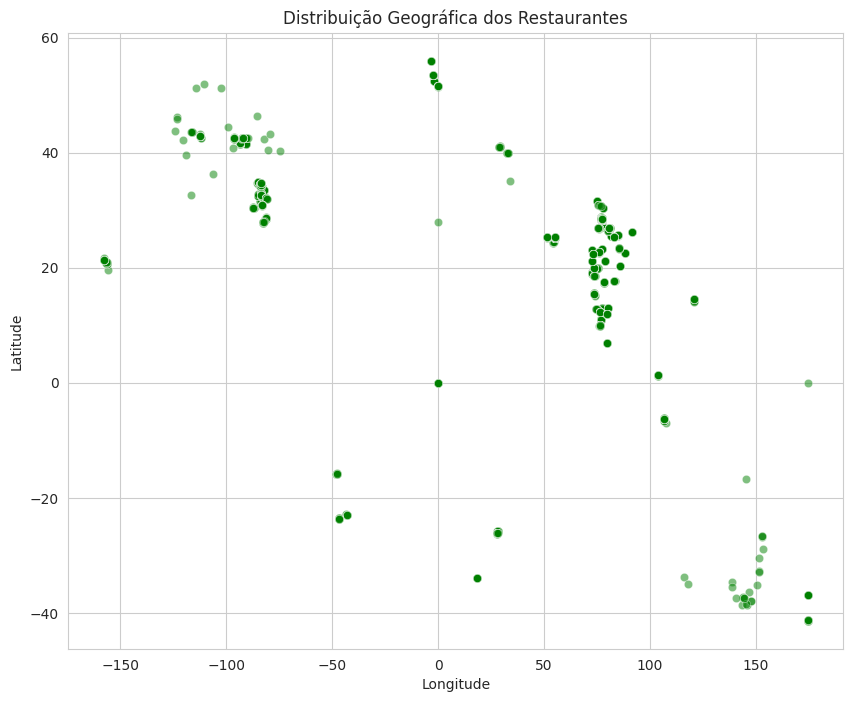

In [36]:
# Scatter Plot de Latitude e Longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=dados, color='green', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Geográfica dos Restaurantes')
plt.grid(True)
plt.show()

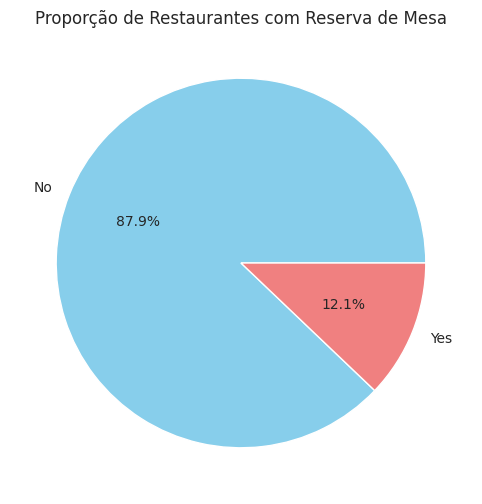

In [34]:
plt.figure(figsize=(8, 6))
dados['Has Table booking'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporção de Restaurantes com Reserva de Mesa')
plt.ylabel('')
plt.show()
